In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

president_data = pd.read_csv('/Users/alessandro/Desktop/ANALYTICS/PROJECTS/USAED/1976_2020_president.csv')

In [61]:
# conda install nbconvert

In [28]:
# Database of US Presidential elecions from 1976 to 2020

president_data

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4282,2020,WYOMING,WY,56,83,68,US PRESIDENT,"JORGENSEN, JO",LIBERTARIAN,False,5768,278503,20210113,NaN,LIBERTARIAN
4283,2020,WYOMING,WY,56,83,68,US PRESIDENT,"PIERCE, BROCK",INDEPENDENT,False,2208,278503,20210113,NaN,OTHER
4284,2020,WYOMING,WY,56,83,68,US PRESIDENT,NaN,NaN,True,1739,278503,20210113,NaN,OTHER
4285,2020,WYOMING,WY,56,83,68,US PRESIDENT,OVERVOTES,NaN,False,279,278503,20210113,NaN,OTHER


In [29]:
# Dataset info

president_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              4287 non-null   int64  
 1   state             4287 non-null   object 
 2   state_po          4287 non-null   object 
 3   state_fips        4287 non-null   int64  
 4   state_cen         4287 non-null   int64  
 5   state_ic          4287 non-null   int64  
 6   office            4287 non-null   object 
 7   candidate         4000 non-null   object 
 8   party_detailed    3831 non-null   object 
 9   writein           4284 non-null   object 
 10  candidatevotes    4287 non-null   int64  
 11  totalvotes        4287 non-null   int64  
 12  version           4287 non-null   int64  
 13  notes             0 non-null      float64
 14  party_simplified  4287 non-null   object 
dtypes: float64(1), int64(7), object(7)
memory usage: 502.5+ KB


In [30]:
# Sorting by the party with more votes, and grouping by the winner party

p_data = president_data.copy()
p_data = p_data[['year', 'state', 'candidatevotes', 'totalvotes', 'party_simplified']]
p_data = p_data.sort_values(by = ['year', 'state', 'candidatevotes'], ascending=[True, True, False])
p_data = p_data.groupby(['year', 'state',])[[ 'party_simplified', 'candidatevotes', 'totalvotes']].agg({'party_simplified': 'first', 'candidatevotes' : 'max', 'totalvotes': 'first'})
p_data = p_data.reset_index()

In [31]:
# Changing column name

p_data.rename(columns={'party_simplified': 'party_winner'}, inplace=True)

In [32]:
# Adding the victory percentage

p_data['victory_percentage'] = (p_data.candidatevotes / p_data.totalvotes)*100

In [33]:
# Removing "DISTRICT OF COLUMBIA"

p_data = p_data.drop(p_data[p_data.state == 'DISTRICT OF COLUMBIA'].index)

In [34]:
p_data = p_data.reset_index(drop = True)

In [35]:
# Adding the previous winner

p_data['previous_winner'] = p_data.groupby(['state'])['party_winner'].shift()

In [36]:
# Adjusting table

p_data = p_data[['year', 'state', 'candidatevotes', 'totalvotes', 'victory_percentage', 'party_winner', 'previous_winner']]

In [37]:
# Sample for 2020

pd_2020 = p_data[(p_data.year == 2020)].reset_index(drop = True)
pd_2020

,year,state,candidatevotes,totalvotes,victory_percentage,party_winner,previous_winner
0,2020,ALABAMA,1441170,2323282,62.031643,REPUBLICAN,REPUBLICAN
1,2020,ALASKA,189951,359530,52.833143,REPUBLICAN,REPUBLICAN
2,2020,ARIZONA,1672143,3387326,49.364691,DEMOCRAT,REPUBLICAN
3,2020,ARKANSAS,760647,1219069,62.395730,REPUBLICAN,REPUBLICAN
4,2020,CALIFORNIA,11110250,17500881,63.483947,DEMOCRAT,DEMOCRAT
5,2020,COLORADO,1804352,3279980,55.011067,DEMOCRAT,DEMOCRAT
6,2020,CONNECTICUT,1080831,1823857,59.260732,DEMOCRAT,DEMOCRAT
7,2020,DELAWARE,296268,504346,58.743006,DEMOCRAT,DEMOCRAT
8,2020,FLORIDA,5668731,11067456,51.219820,REPUBLICAN,REPUBLICAN
9,2020,GEORGIA,2473633,4999960,49.473056,DEMOCRAT,REPUBLICAN


In [38]:
# Adding conditional formatting

# define a function to apply conditional formatting
def highlight_party(val):
    if val == 'REPUBLICAN':
        return 'background-color: rgba(255, 0, 0, 0.5)' # red with 50% opacity
    elif val == 'DEMOCRAT':
        return 'background-color: rgba(0, 0, 255, 0.5)' # blue with 50% opacity
    else:
        return ''

# apply the conditional formatting using the Styler class
styled_df = pd_2020.style.applymap(highlight_party)

# display the styled DataFrame
display(styled_df)

,year,state,candidatevotes,totalvotes,victory_percentage,party_winner,previous_winner
0,2020,ALABAMA,1441170,2323282,62.031643,REPUBLICAN,REPUBLICAN
1,2020,ALASKA,189951,359530,52.833143,REPUBLICAN,REPUBLICAN
2,2020,ARIZONA,1672143,3387326,49.364691,DEMOCRAT,REPUBLICAN
3,2020,ARKANSAS,760647,1219069,62.395730,REPUBLICAN,REPUBLICAN
4,2020,CALIFORNIA,11110250,17500881,63.483947,DEMOCRAT,DEMOCRAT
5,2020,COLORADO,1804352,3279980,55.011067,DEMOCRAT,DEMOCRAT
6,2020,CONNECTICUT,1080831,1823857,59.260732,DEMOCRAT,DEMOCRAT
7,2020,DELAWARE,296268,504346,58.743006,DEMOCRAT,DEMOCRAT
8,2020,FLORIDA,5668731,11067456,51.219820,REPUBLICAN,REPUBLICAN
9,2020,GEORGIA,2473633,4999960,49.473056,DEMOCRAT,REPUBLICAN


In [39]:
# Adding new column to show if the winner changed from previous election

pd_stats = p_data.copy()
pd_stats['changed_winner'] = pd_stats.party_winner != pd_stats.previous_winner

In [40]:
# Adding two rows to indicate if one party won (useful for calculation)

pd_stats['rep_win'] = pd_stats.party_winner == 'REPUBLICAN'
pd_stats['dem_win'] = pd_stats.party_winner == 'DEMOCRAT'
pd_stats

,year,state,candidatevotes,totalvotes,victory_percentage,party_winner,previous_winner,changed_winner,rep_win,dem_win
0,1976,ALABAMA,659170,1182850,55.727269,DEMOCRAT,NaN,True,False,True
1,1976,ALASKA,71555,123574,57.904575,REPUBLICAN,NaN,True,True,False
2,1976,ARIZONA,418642,742719,56.366136,REPUBLICAN,NaN,True,True,False
3,1976,ARKANSAS,498604,767535,64.961728,DEMOCRAT,NaN,True,False,True
4,1976,CALIFORNIA,3882244,7803770,49.748314,REPUBLICAN,NaN,True,True,False
...,...,...,...,...,...,...,...,...,...,...
595,2020,VIRGINIA,2413568,4460524,54.109517,DEMOCRAT,DEMOCRAT,False,False,True
596,2020,WASHINGTON,2369612,4087631,57.970301,DEMOCRAT,DEMOCRAT,False,False,True
597,2020,WEST VIRGINIA,545382,794652,68.631552,REPUBLICAN,REPUBLICAN,False,True,False
598,2020,WISCONSIN,1630866,3298041,49.449537,DEMOCRAT,REPUBLICAN,True,False,True


In [41]:
# States that changed the winner party most times (1980 - 2020) [top 20]

pd_stats1 = pd_stats[(p_data.year > 1976)].copy()
pd_stats1 = pd_stats1.groupby(['state'])[['changed_winner']].sum().reset_index()
pd_stats1 = pd_stats1.sort_values(by = 'changed_winner', ascending=False).reset_index(drop = True)
pd_stats1 = pd_stats1.head(20)
pd_stats1

,state,changed_winner
0,FLORIDA,5
1,OHIO,5
2,IOWA,4
3,WISCONSIN,4
4,PENNSYLVANIA,4
5,GEORGIA,4
6,KENTUCKY,3
7,NEW MEXICO,3
8,NEW HAMPSHIRE,3
9,NEVADA,3


Text(0.5, 1.0, 'Election Results by State')

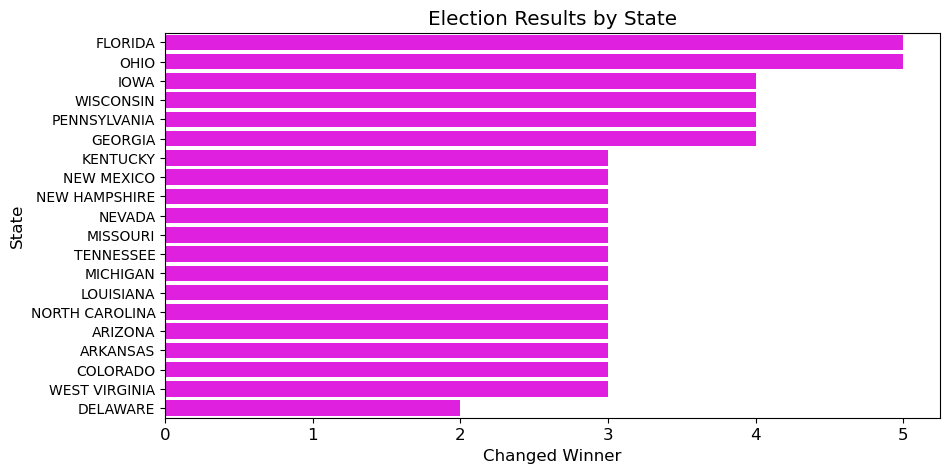

In [42]:
# Visualization of results

# Create a figure object
fig, ax = plt.subplots(figsize=(10, 5))

# Set the font size
matplotlib.rcParams['font.size'] = 12
plt.yticks(fontsize = 10)

# Create bar plot
sns.barplot(x='changed_winner', y='state', data=pd_stats1, color = '#FF00FF')

# Add labels and titles
ax.set_xlabel('Changed Winner')
ax.set_ylabel('State')
ax.set_title('Election Results by State')

In [43]:
# States with most republican wins (1976 - 2020) [top 20]

pd_stats2 = pd_stats.groupby(['state'])[['rep_win']].sum().reset_index().copy()
pd_stats2 = pd_stats2.sort_values(by='rep_win', ascending=False).reset_index(drop = True)
pd_stats2 = pd_stats2.head(20)
pd_stats2

,state,rep_win
0,WYOMING,12
1,UTAH,12
2,SOUTH DAKOTA,12
3,OKLAHOMA,12
4,NORTH DAKOTA,12
5,NEBRASKA,12
6,ALASKA,12
7,IDAHO,12
8,KANSAS,12
9,INDIANA,11


Text(0.5, 1.0, 'Election Results by State')

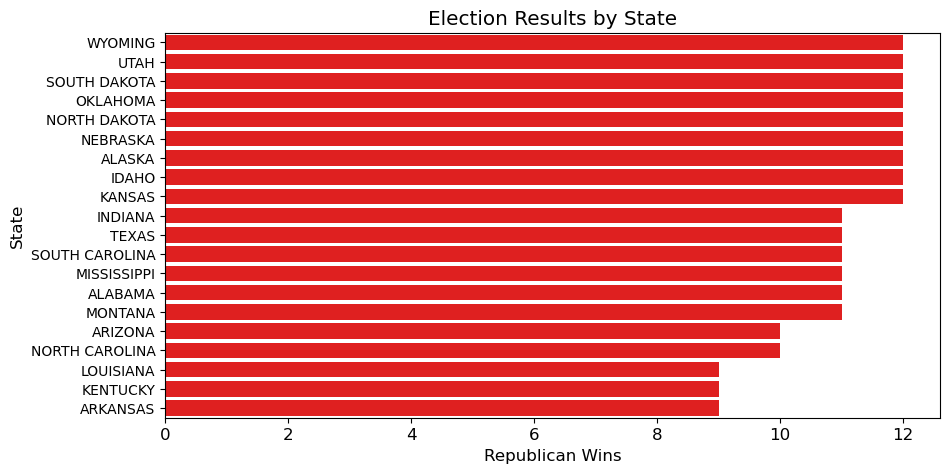

In [44]:
# Visualization of results

# Create a figure object
fig, ax = plt.subplots(figsize=(10, 5))

# Set the font size
matplotlib.rcParams['font.size'] = 12
plt.yticks(fontsize = 10)

# Create bar plot
sns.barplot(x='rep_win', y='state', data=pd_stats2, color = '#FF0000')

# Add labels and titles
ax.set_xlabel('Republican Wins')
ax.set_ylabel('State')
ax.set_title('Election Results by State')

In [45]:
# States with most democrat wins (1976 - 2020) [top 20]

pd_stats3 = pd_stats.groupby(['state'])[['dem_win']].sum().reset_index().copy()
pd_stats3 = pd_stats3.sort_values(by='dem_win', ascending=False).reset_index(drop = True)
pd_stats3 = pd_stats3.head(20)
pd_stats3

,state,dem_win
0,MINNESOTA,12
1,NEW YORK,11
2,RHODE ISLAND,11
3,HAWAII,11
4,MARYLAND,10
5,MASSACHUSETTS,10
6,WASHINGTON,9
7,OREGON,9
8,DELAWARE,9
9,WISCONSIN,9


Text(0.5, 1.0, 'Election Results by State')

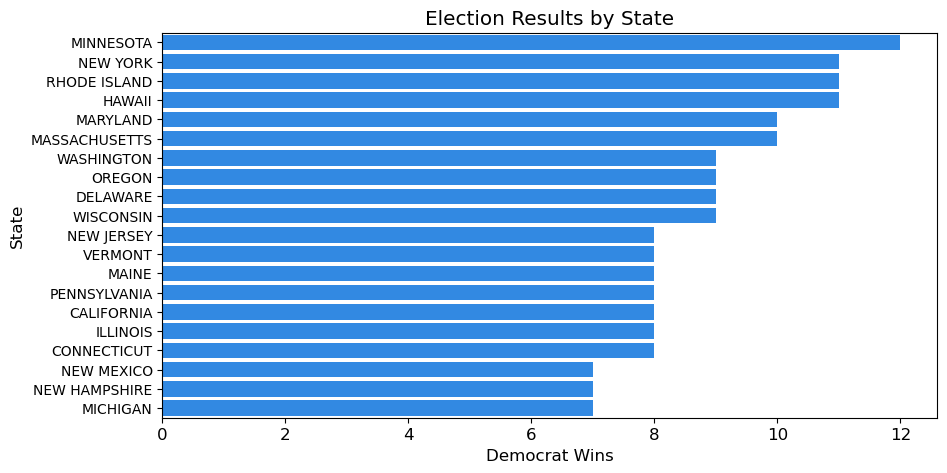

In [46]:
# Visualization of results

# Create a figure object
fig, ax = plt.subplots(figsize=(10, 5))

# Set the font size
matplotlib.rcParams['font.size'] = 12
plt.yticks(fontsize = 10)

# Create bar plot
sns.barplot(x='dem_win', y='state', data=pd_stats3, color = '#1589FF')

# Add labels and titles
ax.set_xlabel('Democrat Wins')
ax.set_ylabel('State')
ax.set_title('Election Results by State')

In [47]:
# Data from 2020
# States that changed winner form 2016 to 2020

changed_2020 = pd_stats[(pd_stats.year == 2020) & (pd_stats.changed_winner == True)]
changed_2020 = changed_2020.reset_index(drop = True)
changed_2020 = changed_2020[['state']]
changed_2020

,state
0,ARIZONA
1,GEORGIA
2,MICHIGAN
3,PENNSYLVANIA
4,WISCONSIN


In [48]:
p_data_2020 = pd_stats[(p_data.year == 2020)]
p_data_2020 = p_data_2020[['state', 'party_winner', 'victory_percentage']].reset_index(drop = True)
p_data_2020_s = p_data_2020.style.applymap(highlight_party)
p_data_2020_s

,state,party_winner,victory_percentage
0,ALABAMA,REPUBLICAN,62.031643
1,ALASKA,REPUBLICAN,52.833143
2,ARIZONA,DEMOCRAT,49.364691
3,ARKANSAS,REPUBLICAN,62.395730
4,CALIFORNIA,DEMOCRAT,63.483947
5,COLORADO,DEMOCRAT,55.011067
6,CONNECTICUT,DEMOCRAT,59.260732
7,DELAWARE,DEMOCRAT,58.743006
8,FLORIDA,REPUBLICAN,51.219820
9,GEORGIA,DEMOCRAT,49.473056


In [49]:
# Biggest Repuplican wins in 2020 (10)

rw_2020 = p_data_2020[(p_data_2020.party_winner == 'REPUBLICAN')]
rw_2020 = rw_2020.sort_values(by='victory_percentage', ascending = False).reset_index(drop = True).head(10)
rw_2020

,state,party_winner,victory_percentage
0,WYOMING,REPUBLICAN,69.499790
1,WEST VIRGINIA,REPUBLICAN,68.631552
2,OKLAHOMA,REPUBLICAN,65.373272
3,NORTH DAKOTA,REPUBLICAN,65.114049
4,IDAHO,REPUBLICAN,63.837565
5,ARKANSAS,REPUBLICAN,62.395730
6,KENTUCKY,REPUBLICAN,62.086572
7,ALABAMA,REPUBLICAN,62.031643
8,SOUTH DAKOTA,REPUBLICAN,61.769390
9,TENNESSEE,REPUBLICAN,60.660294


In [50]:
# Biggest Democrat wins in 2020 (10)

dw_2020 = p_data_2020[(p_data_2020.party_winner == 'DEMOCRAT')]
dw_2020 = dw_2020.sort_values(by='victory_percentage', ascending = False).reset_index(drop = True).head(10)
dw_2020

,state,party_winner,victory_percentage
0,VERMONT,DEMOCRAT,65.455781
1,MARYLAND,DEMOCRAT,65.360665
2,MASSACHUSETTS,DEMOCRAT,65.122984
3,CALIFORNIA,DEMOCRAT,63.483947
4,HAWAII,DEMOCRAT,63.149380
5,NEW YORK,DEMOCRAT,60.391885
6,RHODE ISLAND,DEMOCRAT,59.476199
7,CONNECTICUT,DEMOCRAT,59.260732
8,DELAWARE,DEMOCRAT,58.743006
9,WASHINGTON,DEMOCRAT,57.970301


In [51]:
# Closest races

cr_2020 = p_data_2020.sort_values(by='victory_percentage', ascending = True).reset_index(drop = True).head(10)
cr_2020

,state,party_winner,victory_percentage
0,ARIZONA,DEMOCRAT,49.364691
1,WISCONSIN,DEMOCRAT,49.449537
2,GEORGIA,DEMOCRAT,49.473056
3,NORTH CAROLINA,REPUBLICAN,49.934332
4,PENNSYLVANIA,DEMOCRAT,50.008496
5,NEVADA,DEMOCRAT,50.056782
6,MICHIGAN,DEMOCRAT,50.620818
7,FLORIDA,REPUBLICAN,51.219820
8,TEXAS,REPUBLICAN,52.057604
9,MINNESOTA,DEMOCRAT,52.395099


In [52]:
# MAP visualization for 2020
# Excluding Alaska and Hawaii for visualization porpuses

p_data_2020_map = p_data_2020[['state', 'party_winner']].copy()
p_data_2020_map = p_data_2020_map.drop(p_data_2020_map[p_data_2020_map['state'] == 'DISTRICT OF COLUMBIA'].index).reset_index(drop = True)
p_data_2020_map = p_data_2020_map.drop(p_data_2020_map[p_data_2020_map['state'] == 'ALASKA'].index).reset_index(drop = True)
p_data_2020_map = p_data_2020_map.drop(p_data_2020_map[p_data_2020_map['state'] == 'HAWAII'].index).reset_index(drop = True)

In [53]:
# conda install -c conda-forge basemap

In [54]:
# conda install -c conda-forge geopandas

In [55]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile for the United States
us_map = gpd.read_file('/Users/alessandro/Desktop/ANALYTICS/PROJECTS/USAED/cb_2018_us_state_500k/cb_2018_us_state_500k.shp')


In [56]:
us_map.rename(columns={'NAME': 'state'}, inplace=True)
us_map['state'] = us_map['state'].str.upper()

In [57]:
us_map = pd.merge(us_map, p_data_2020_map, on = 'state', how = 'inner')
#us_map[['party_winner']]

In [58]:
# Create a dictionary mapping party winners to colors
colors = {'REPUBLICAN': 'red', 'DEMOCRAT': 'blue'}

# Create a new column in the dataframe with the color for each state
us_map['color'] = us_map['party_winner'].map(colors)

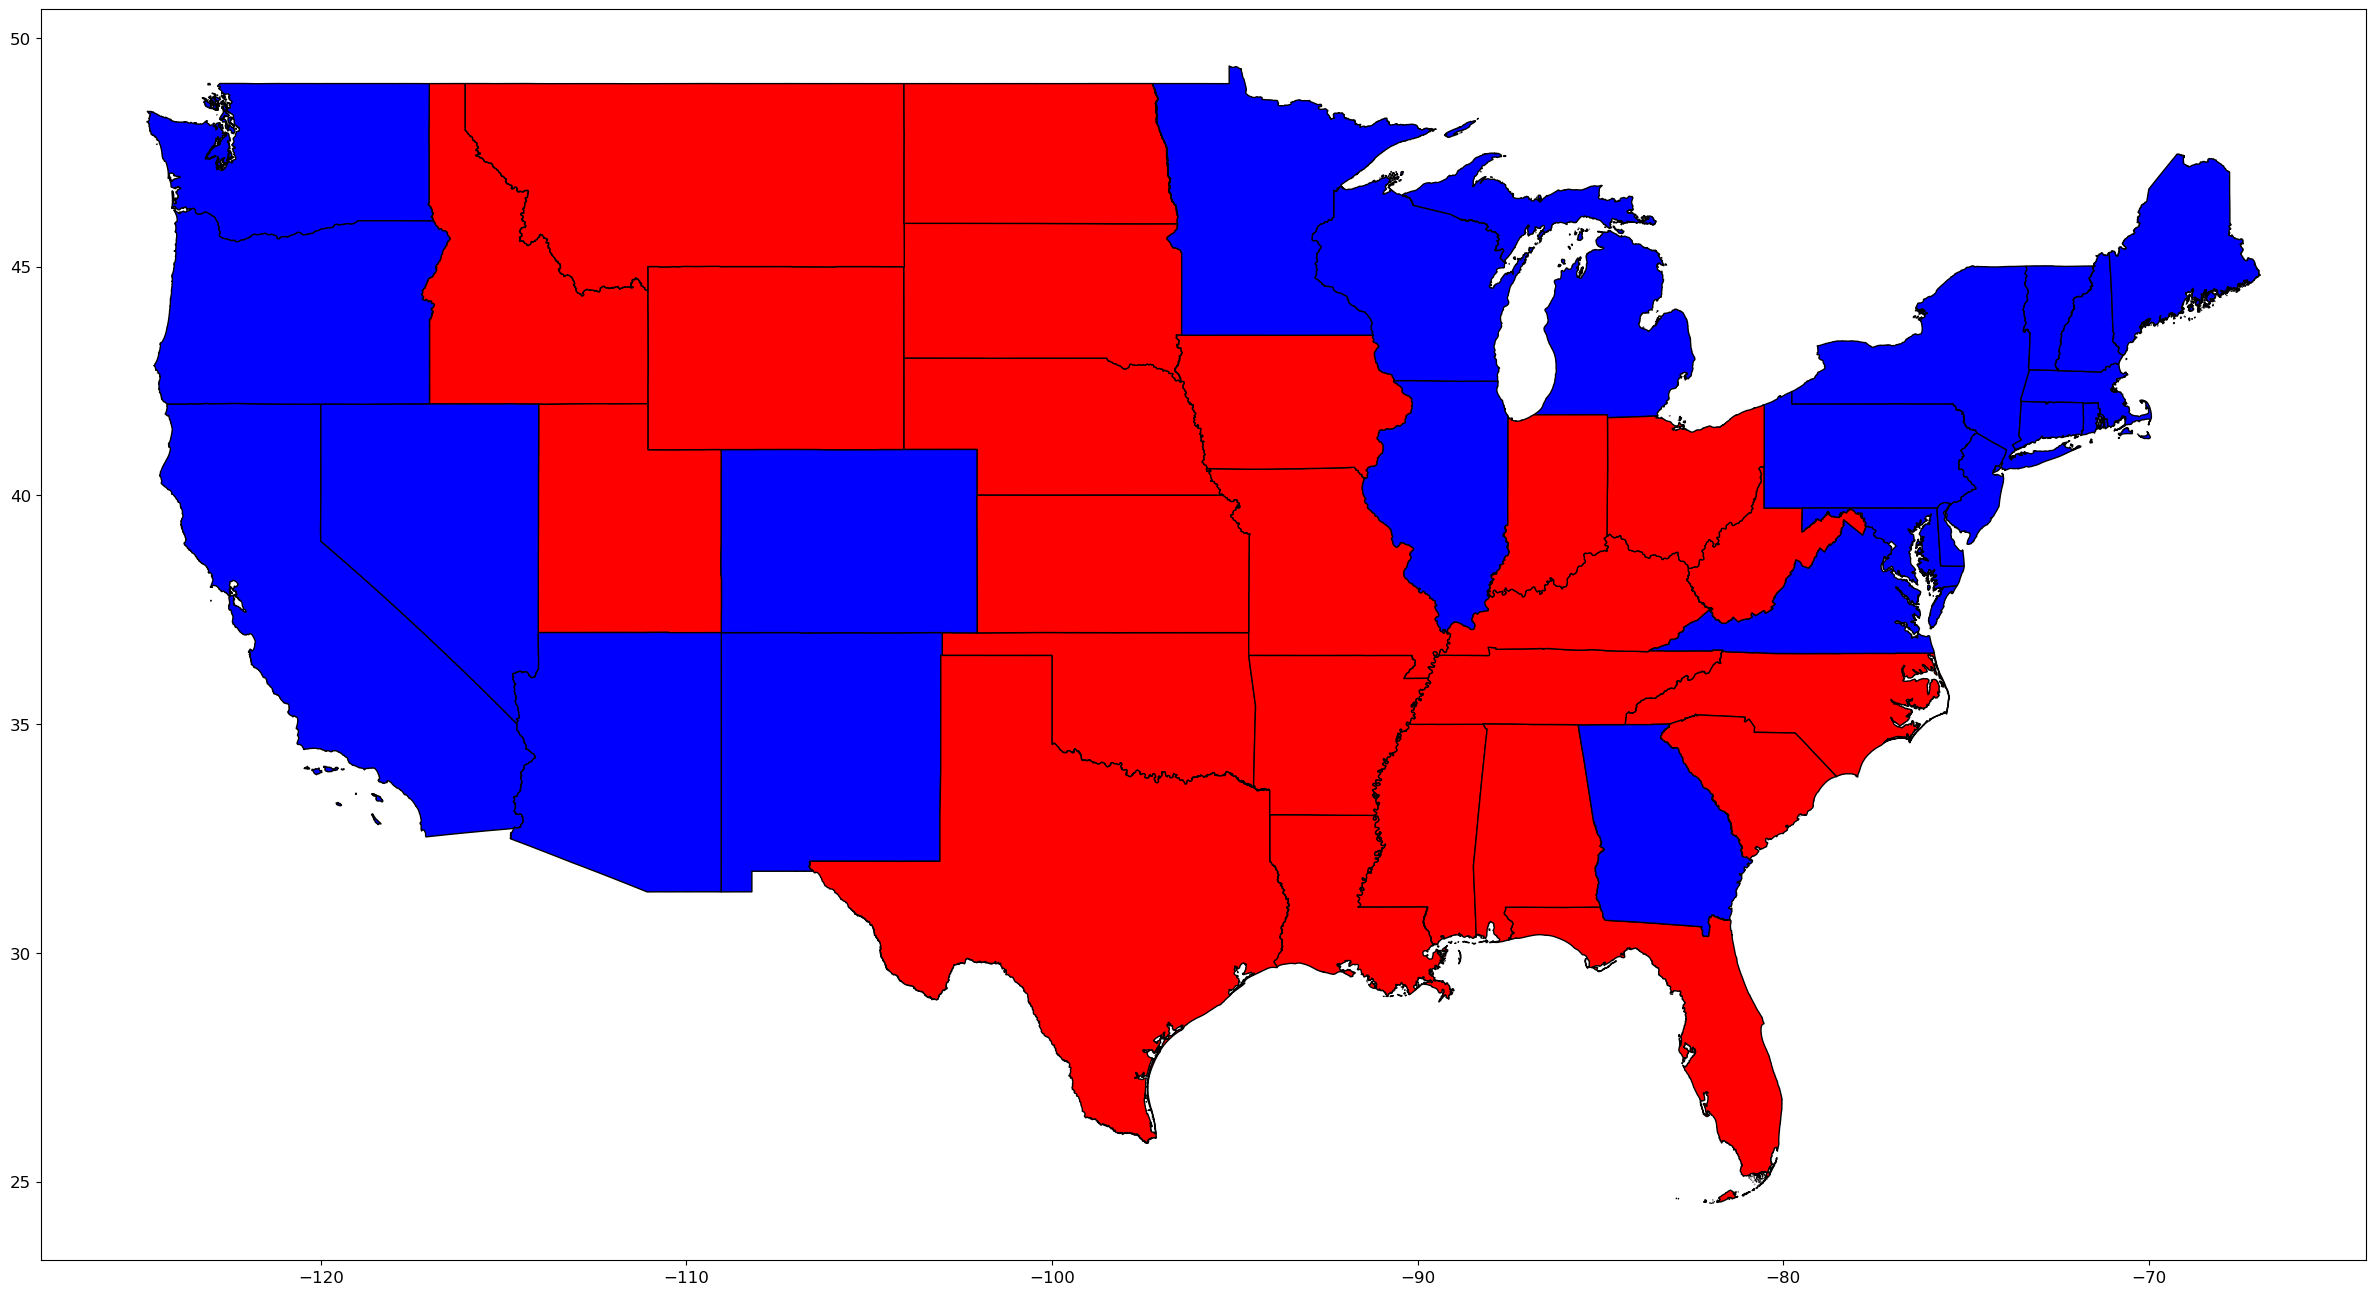

In [59]:
# Draw the map
fig, ax = plt.subplots(figsize=(30, 80))
us_map.plot(ax=ax, color=us_map['color'], edgecolor='black')
plt.show()